In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Diwali Sales Data.csv',encoding= 'unicode_escape')

In [3]:
data.shape

(11251, 15)

In [4]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [5]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# Data_Cleaning

In [6]:
# data.loc[data['Marital_Status']==data['Marital_Status'].isnull()]

In [7]:
# np.where((data.Marital_Status == 0),'Married',data.Marital_Status)

In [8]:
data.drop(columns=['Status', 'unnamed1'],inplace=True)

In [9]:
data

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [10]:
# data.info()

In [11]:
pd.isnull(data).sum()
# checking null value sum

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [12]:
# deleting null value from dataframe
data.dropna(inplace=True)

In [13]:
pd.isnull(data).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [14]:
# data_type change
data['Amount']=data['Amount'].astype(int)

In [15]:
data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [16]:
data[['Amount','Age']].describe()

,Amount,Age
count,11239.000000,11239.000000
mean,9453.610553,35.410357
std,5222.355168,12.753866
min,188.000000,12.000000
25%,5443.000000,27.000000
50%,8109.000000,33.000000
75%,12675.000000,43.000000
max,23952.000000,92.000000


# Visual_Analysis

<Axes: xlabel='Gender', ylabel='count'>

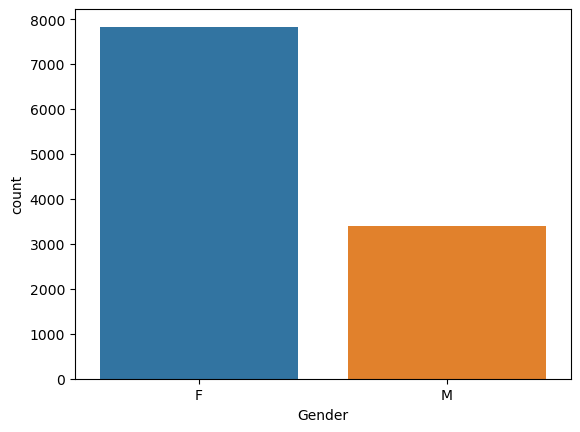

In [17]:
sns.countplot(x='Gender',data=data)

In [18]:
sales_data=data.groupby('Gender').agg({'Amount':'sum'}).reset_index()

<Axes: xlabel='Gender', ylabel='Amount'>

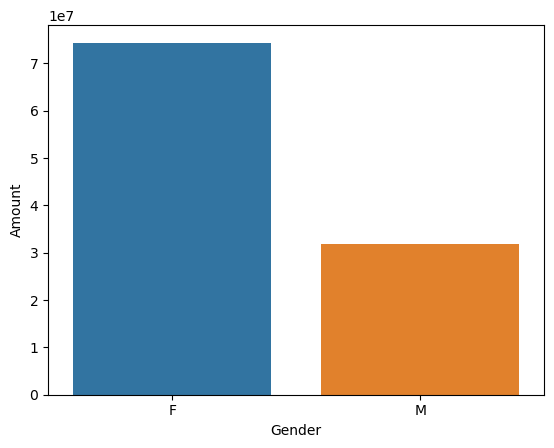

In [19]:
sns.barplot(x='Gender',y='Amount',data=sales_data)

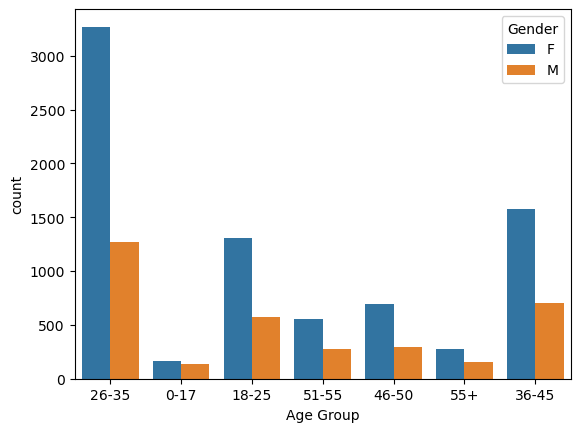

In [20]:
ax=sns.countplot(data,x='Age Group',hue='Gender')

# for bars in ax.container:
#     bar_label(bars)

In [21]:
sales_state=data.groupby('State').agg({'Orders':'sum'}).reset_index().sort_values(by='Orders',ascending=False).head(10)

<Axes: xlabel='State', ylabel='Orders'>

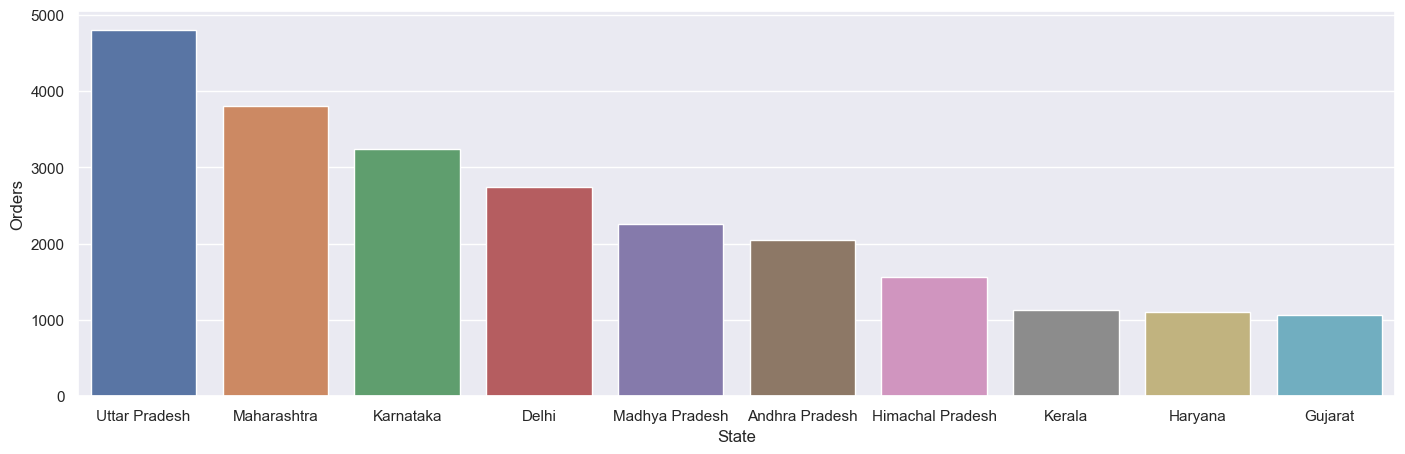

In [22]:
sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(y='Orders',x='State',data=sales_state)